<a href="https://colab.research.google.com/github/rauluri21/Mi_primer_repositorio/blob/main/SI_Practica_2_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
iris = datasets.load_iris()
data = iris.data
labels = iris.target


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
hidden_layer_sizes = [(10,), (20,), (30,), (40,)]
solvers = ['adam', 'lbfgs', 'sgd']
max_iterations = [100, 200, 300]

best_accuracy = 0
best_params = None

for hidden_layer in hidden_layer_sizes:
    for solver in solvers:
        for max_iter in max_iterations:
            mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, solver=solver, max_iter=max_iter, random_state=42)
            mlp.fit(train_data, train_labels)
            y_pred = mlp.predict(test_data)
            accuracy = accuracy_score(test_labels, y_pred)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = (hidden_layer, solver, max_iter)

/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = 

Best Parameters:
Hidden Layers: (10,)
Solver: lbfgs
Max Iterations: 100


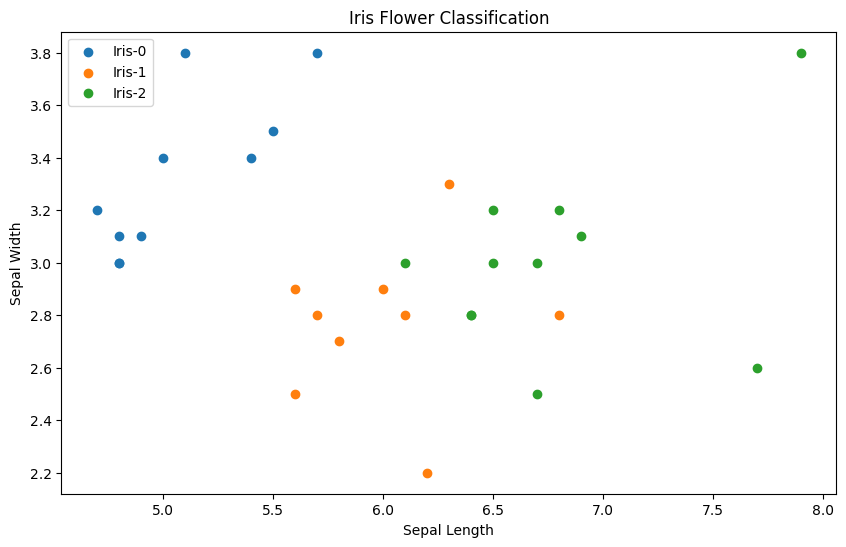

In [ ]:
print("Best Parameters:")
print("Hidden Layers:", best_params[0])
print("Solver:", best_params[1])
print("Max Iterations:", best_params[2])

# Plotting
plt.figure(figsize=(10, 6))

for i in range(3):
    plt.scatter(test_data[test_labels == i][:, 0], test_data[test_labels == i][:, 1], label=f'Iris-{i}')

for i in range(3):
    incorrect = np.where(y_pred != test_labels)[0]
    plt.scatter(test_data[incorrect][:, 0], test_data[incorrect][:, 1], facecolors='none', edgecolors='r', marker='o', s=100)

plt.legend()
plt.title("Iris Flower Classification")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()